# ISEL - CPS 
## Semestre 2023/24
# <br>
###  <center> Trabalho Prático 1 - Comunicações Digitais</center>
# </br>


Trabalho realizado por:
* João Ramos, numero <b> 50730 </b>
* Miguel Alcobia, numero <b> 50746 </b>
* Fábio Pestana, numero <b> 50756 </b>

<b> Turma L31 - Joel Paulo </b>

<b> Nota: na entrega o nome do ficheiro deve ser alterado para conter o número dos alunos do grupo:</b>
CPS_T1_Num1_Num2_Num3.ipynb

Devem usar o style guide PEP8: https://peps.python.org/pep-0008/


# Introdução
A figura representa o esquema típico do processo de envio e recepção de informação usando modulações
digitais.

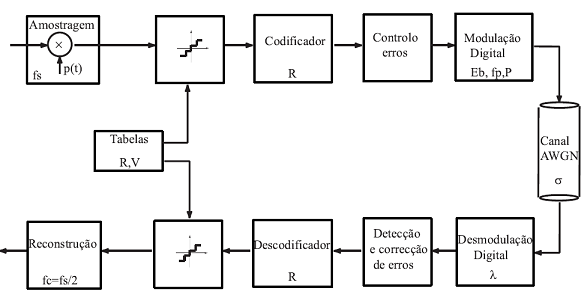

O 1º trabalho de CPS foca os blocos da codificação, dos Códigos Detectores e Correctores de Erros e Modulações Digitais.



# A. Quantificação

Considere que o conjunto de sinais em estudo foi adquirido com uma frequência de amostragem conhecida, $Fs$, e que a quantificação é realizada pela função em baixo.
Nesta função é criada a tabela com os valores de decisão e valores de quantificação e realuzada a quantificação uniforme (do tipo midrise).

Esta função tem como parâmetros de entrada o sinal a quantificar (x), o número de bits por amostra (R), o valor máximo a quantificar (Vmax). Como parâmetros de saída é devolvido o sinal quanfitifado (xq) e os indices associados ao nível de quantificação associado a cada amostra (iq). 

In [1]:
import numpy as np

def quantificadorIntegrado2(x, Vmax, R):
    '''Quantificador Uniforme MidRise
    input: 
    x - sinal de entrada a quantificar
    Vmax - valor maximo da gama dinamica (assumindo [-Vmax, Vmax])
    R - numero de bits do quantificador
    output:
    xq - sinal quantificado
    iq - indices do sinal quantificado
    '''
    Vmin = -Vmax
    levels = 2**R
    delta = (2*Vmax)/levels
    nQuantificacao= np.arange(Vmin+delta/2,Vmax,delta)
    fronteiras = np.arange(Vmin+delta,Vmax+delta/2,delta)
    indices=np.arange(len(nQuantificacao))
    xqq=np.zeros(len(x))
    iq=np.zeros(len(x))
    for i in range(len(x)):
        t = x[i] < fronteiras
        #print(t)
        j = indices[t][0] if np.any(t) else indices[-1]
        iq[i] = j
        xqq[i]= nQuantificacao[j] 
    return xqq, iq

In [2]:
''' Teste Unitario da funcao ''' 
import numpy as np
n = np.arange(25)
x = 4*np.cos(2*np.pi*100/5000*n)
print(x)
Vmax = 4
nbits = 3
xq, iq = quantificadorIntegrado2(x, Vmax, nbits)
print(xq)

[ 4.          3.96845881  3.87433264  3.71910594  3.50522672  3.23606798
  2.91587451  2.54969596  2.14330718  1.70311717  1.23606798  0.74952526
  0.25116208 -0.25116208 -0.74952526 -1.23606798 -1.70311717 -2.14330718
 -2.54969596 -2.91587451 -3.23606798 -3.50522672 -3.71910594 -3.87433264
 -3.96845881]
[ 3.5  3.5  3.5  3.5  3.5  3.5  2.5  2.5  2.5  1.5  1.5  0.5  0.5 -0.5
 -0.5 -1.5 -1.5 -2.5 -2.5 -2.5 -3.5 -3.5 -3.5 -3.5 -3.5]


## A.1 Estudo do erro que quantificação
Use uma função sinusoidal e represente o sinal original, quantificado e o sinal de erro

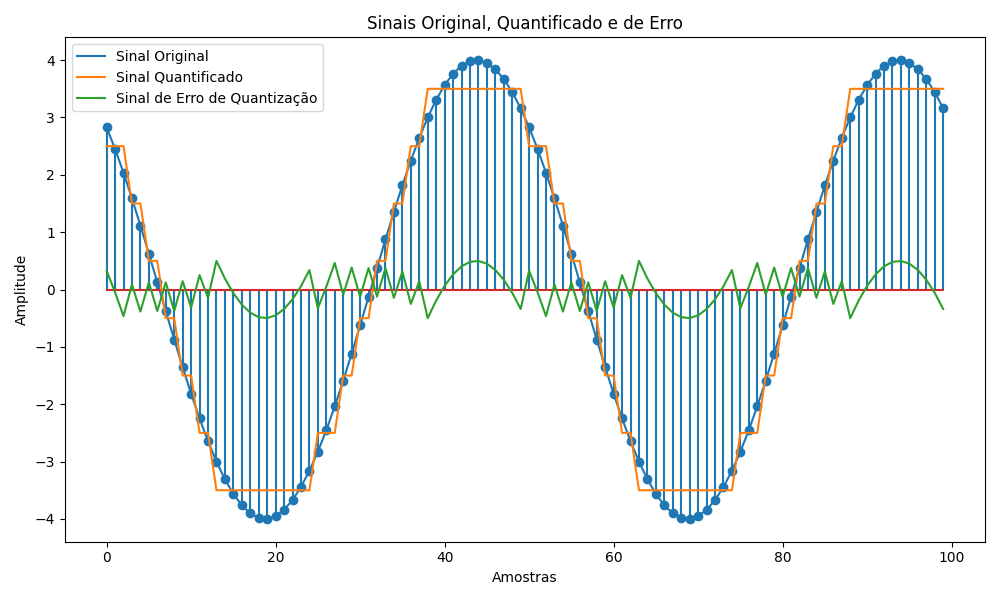

In [3]:
# Usando a função e os dados fornecidos acima:

#imports
import matplotlib.pyplot as plt

# Função sinusoidal
n = np.arange(100)
x = 4 * np.cos(2 * np.pi * 100 / 5000 * n + np.pi / 4)

# Parâmetros do quantificador
Vmax = 4
nbits = 3

# Função para quantificar o sinal
xq, iq = quantificadorIntegrado2(x, Vmax, nbits)

# Calculo do sinal de erro
erro = x - xq

#Plots interativos (descomentar caso seja necessário fazer zoom)
%matplotlib widget

# Figura para mostrar os sinais original, quantificado e de erro
plt.figure(figsize=(10, 6))

plt.plot(n, x, label='Sinal Original')
plt.stem(n, x) #Mostrar Pontos
plt.plot(n, xq, label='Sinal Quantificado')
plt.plot(n, erro, label='Sinal de Erro de Quantização')

plt.title('Sinais Original, Quantificado e de Erro')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

Represente o histograma do sinal de erro. Comente os resultados.

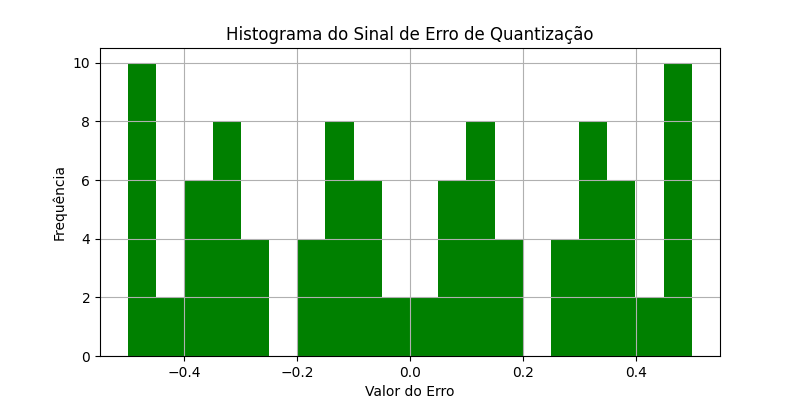

In [4]:
plt.figure(figsize=(8, 4))
plt.hist(erro, bins=20, color='green')
plt.title('Histograma do Sinal de Erro de Quantização')
plt.xlabel('Valor do Erro')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

> Comentário:

O histograma do sinal de erro mostra a distribuição dos valores do erro de quantização ao longo do tempo. 

No histograma acima, o erro de quantização está próximo de zero, o que indica que a quantização está a ser realizada de forma uniforme, sem distorção.

Podemos concluir que a quantização foi eficaz.

## A.2 Relação de Sinal Ruído 

Crie uma função que meça o SNR prático, ou seja, medindo a potência do sinal e a potência do sinal de erro (neste caso de quantificação).


In [5]:
import numpy as np

def Measure_SNRp(x, xq):
    # Encontre o tamanho comum entre os arrays
    common_size = min(len(x), len(xq))
    
    # Calcule a potência do sinal original usando apenas os índices comuns
    amplitude = np.max(np.abs(x[:common_size]))  # Obtém a amplitude do sinal
    pot_signal = 0.5 * (amplitude**2)
    
    # Calcule o sinal de erro de quantização usando apenas os índices comuns
    error = x[:common_size] - xq[:common_size]
    
    # Calcule a potência do sinal de erro
    amplitudeErro = np.max(np.abs(error))  # Obtém a amplitude do erro
    pot_error = 0.5 * (amplitudeErro**2)
    
    # Verifique se pot_error é zero antes de calcular o SNR
    if pot_error == 0:
        SNRp = np.inf
    else:
        # Calcule o SNR prático em dB
        SNRp = 10 * np.log10(pot_signal / pot_error)
    
    return SNRp


Crie uma função que calcule o SNR para o caso da quantificação uniforme.

$SNRt_{dB}= 6,02 \times N_b + 10 \log_{10} \frac{3 P_x}{V_{max}}$

In [6]:
def Measure_SNRt(R,Vmax,P):
    # Calcule a potência do sinal original
    Px = P

    # Calcule o número de bits
    Nb = R

    # Calcule o SNR total em dB
    SNRtdb = 6.02 * Nb + 10 * np.log10(3 * Px / Vmax)

    return SNRtdb

## A.3 Testes
Considere um sinal de rampa, x(t), entre [-Vmax, Vmax] com um incremento defenido por si.
Realize a quantificação deste sinal para cada valor de R={3,4,5,6,7,8}.
Meça a SNR prática e o valor teórico. 
Construa um gráfico com ambos os valores da SNR teórica e medida em função do número de bits R. Comente os resultados.

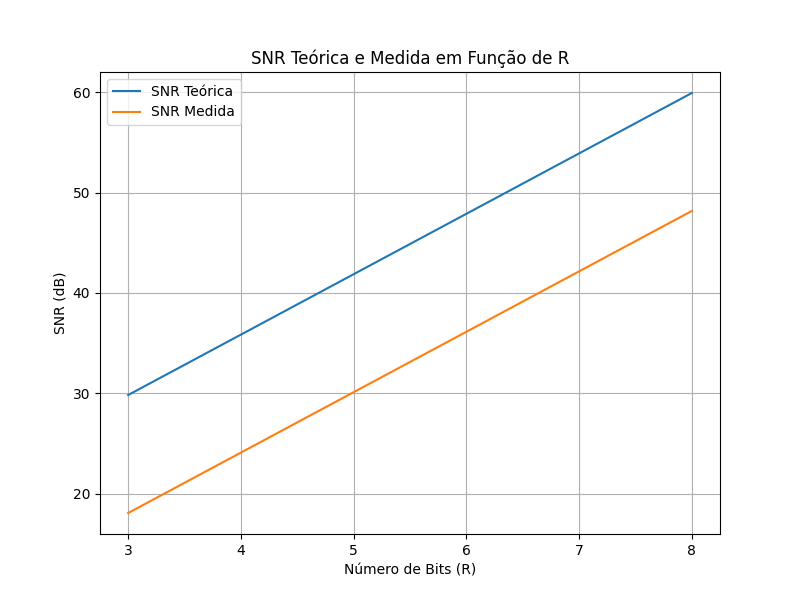

R = 3, SNR Teórica = 29.82 dB, SNR Medida = 18.06 dB
R = 4, SNR Teórica = 35.84 dB, SNR Medida = 24.08 dB
R = 5, SNR Teórica = 41.86 dB, SNR Medida = 30.10 dB
R = 6, SNR Teórica = 47.88 dB, SNR Medida = 36.12 dB
R = 7, SNR Teórica = 53.90 dB, SNR Medida = 42.14 dB
R = 8, SNR Teórica = 59.92 dB, SNR Medida = 48.16 dB


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Defina o sinal de rampa
Vmax = 10  # Valor máximo da rampa
incremento = 0.1  # Incremento do sinal de rampa
t = np.arange(-Vmax, Vmax, incremento)
rampa = t

# Valores de R (número de bits)
R_array = [3, 4, 5, 6, 7, 8]

# Inicialize listas para armazenar os valores da SNR teórica e medida
snr_teoria = []
snr_medida = []

for R in R_array:
    # Realize a quantificação do sinal de rampa
    xqq, iq = quantificadorIntegrado2(rampa, Vmax, R)

    # Calcule a SNR prática
    Snr_Medido = Measure_SNRp(rampa,xqq)
    snr_medida.append(Snr_Medido)
    
    # Calcule a SNR teórica
    amplitude = np.max(np.abs(rampa))  # Obtém a amplitude do sinal
    P = 0.5 * (amplitude**2)
    Snr_Teorico = Measure_SNRt(R,Vmax,P)
    snr_teoria.append(Snr_Teorico)



# Crie um gráfico
plt.figure(figsize=(8, 6))
plt.plot(R_array, snr_teoria, label='SNR Teórica')
plt.plot(R_array, snr_medida, label='SNR Medida')
plt.xlabel('Número de Bits (R)')
plt.ylabel('SNR (dB)')
plt.title('SNR Teórica e Medida em Função de R')
plt.legend()
plt.grid(True)
plt.show()

# Comente os resultados
for i in range(len(R_array)):
    print(f'R = {R_array[i]}, SNR Teórica = {snr_teoria[i]:.2f} dB, SNR Medida = {snr_medida[i]:.2f} dB')


> Comentário:

O gráfico apresentado mostra a relação entre o número de bits (R) e a relação sinal-ruído (SNR) teórica e medida. A SNR teórica é calculada assumindo que a quantização é ideal, enquanto a SNR medida é calculada a partir de dados reais.

O gráfico mostra que a SNR aumenta com o número de bits. Isso ocorre porque um maior número de bits permite uma quantização mais precisa.

No entanto, o gráfico também mostra que a SNR medida é inferior à SNR teórica para todos os valores de R.

A diferença entre a SNR teórica e medida é conhecida como perda de quantização. A perda de quantização é um indicador da qualidade da quantização.

No caso do gráfico apresentado, a perda de quantização é relativamente baixa, indicando que a quantização é eficaz.

## A.4 Testes com voz
Grave um sinal de voz através do microfone com aproximadamente um segundo de duração. Faça a quantifição do sinal para cada valor de R={3,4,5,6,7,8}. Meça a SNR prática e o valor teórico (para determinar a potência no caso teórico deve usar o mesmo valor que na prática). Construa um gráfico com ambos os valores da SNR teórica e SNR medida em função do número de bits R. Comente os resultados

Audio original:


Audio quantificado com R: 3


Audio quantificado com R: 4


Audio quantificado com R: 5


Audio quantificado com R: 6


Audio quantificado com R: 7


Audio quantificado com R: 8


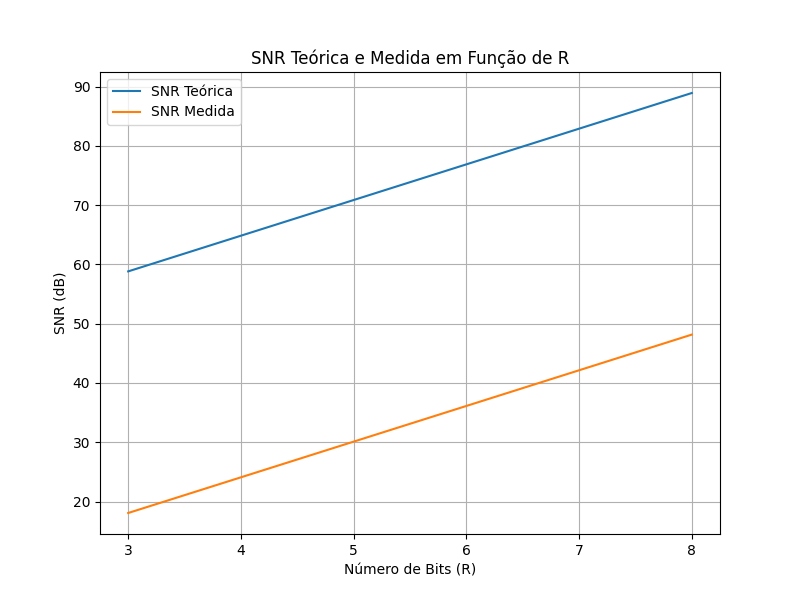

R = 3, SNR Teórica = 58.83 dB, SNR Medida = 18.06 dB
R = 4, SNR Teórica = 64.85 dB, SNR Medida = 24.08 dB
R = 5, SNR Teórica = 70.87 dB, SNR Medida = 30.10 dB
R = 6, SNR Teórica = 76.89 dB, SNR Medida = 36.12 dB
R = 7, SNR Teórica = 82.91 dB, SNR Medida = 42.14 dB
R = 8, SNR Teórica = 88.93 dB, SNR Medida = 48.16 dB


In [8]:
import scipy.io.wavfile as wav
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display


fs, data = wav.read("TesteVoz.wav")
print("Audio original:")
display(Audio(data, rate=fs))

Vmax = np.max(np.abs(data))  # Valor máximo do som

# Valores de R (número de bits)
R_array = [3, 4, 5, 6, 7, 8]

# Inicialize listas para armazenar os valores da SNR teórica e medida
snr_teoria = []
snr_medida = []

for R in R_array:
    # Realize a quantificação do sinal de rampa
    xqq, iq = quantificadorIntegrado2(data, Vmax, R)
    print("Audio quantificado com R:" , R)
    display(Audio(xqq, rate=fs))

    # Calcule a SNR prática
    Snr_Medido = Measure_SNRp(data,xqq)
    snr_medida.append(Snr_Medido)
 
    # Calcule a SNR teórica
    amplitude = np.max(np.abs(data))  # Obtém a amplitude do sinal
    P = 0.5 * (amplitude**2)

    Snr_Teorico = Measure_SNRt(R,Vmax,P)
    snr_teoria.append(Snr_Teorico)



# Crie um gráfico
plt.figure(figsize=(8, 6))
plt.plot(R_array, snr_teoria, label='SNR Teórica')
plt.plot(R_array, snr_medida, label='SNR Medida')
plt.xlabel('Número de Bits (R)')
plt.ylabel('SNR (dB)')
plt.title('SNR Teórica e Medida em Função de R')
plt.legend()
plt.grid(True)
plt.show()

# Comente os resultados
for i in range(len(R_array)):
    print(f'R = {R_array[i]}, SNR Teórica = {snr_teoria[i]:.2f} dB, SNR Medida = {snr_medida[i]:.2f} dB')


> Comentário:

Ouvindo os diferentes áudios podemos perceber que o o ruído presente é mínimo, mesmo para o áudio com R=3, é perceptível a palavra "Teste" com um pequeno ruído de fundo.

Com base nos resultados apresentados no gráfico, podemos concluir que o SNR aumenta de forma significativa com o número de bits. No entanto, o aumento é mais lento do que o previsto pela teoria. Isso acontece porque o ruído não é apenas um fenômeno aleatório, mas também é influenciado por fatores não-lineares.

A gravação de um som de 1 segundo no microfone permitiu verificar que o ruido diminui à medida que o número de número de Bits (R) aumenta.

NOTA: Este som foi gravado num microfone de um headset e depois foi amplificado no programa Audacity para se ouvir melhor, pois estava muito baixo.

# B. Codificação/ Descodificação

Construa uma função Python que dado um Numpy array (com dimensão  𝑁 ) com valores inteiros, retorne um Numpy array (com dimensão  𝑁.𝑅×1 ) com os mesmos valores convertidos para binário. Para facilitar a realização do processamento nos blocos subsequentes aconselha-se a que cada bit esteja guardado individualmente. Esta função ainda deve receber como parâmetros de entrada o número de bits ( 𝑅 ) a usar na conversão de cada inteiro.

In [9]:
import numpy as np
import itertools

def Codific(arr_signal_quantized, R):
    # Converter os valores float para inteiros
    arr_signal_quantized_int = arr_signal_quantized.astype(int)

    valores = "0" + str(R) + "b"
    array = list(map(lambda z: format(z, valores), arr_signal_quantized_int.flatten()))
    
    # Separar os caracteres das representações binárias
    s = itertools.chain(*array)
    
    # Converter para int, ignorando o sinal negativo
    arrayint = [int(char) if char != '-' else 0 for char in s]

    arr_binary = np.array(arrayint)
    return arr_binary

# Exemplo de uso
arr_signal_quantized = np.array([[1, 1, 7, 10]])
R = 4
arr_binary = Codific(arr_signal_quantized, R)

print("Array de entrada:")
print(arr_signal_quantized.flatten())

print("\nArray binário:")
print(arr_binary)

Array de entrada:
[ 1  1  7 10]

Array binário:
[0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0]


### Comentário importante

O grupo reconhceu um problema na codificação, na forma com a função lida com valores negativos. Contudo, não se encontrou nenhuma forma de contornar o problema e converter os valores negativos, de forma correta, em binário sem afetar o tamanho do array (devido ao número de bits por inteiro).

Exemplo:

10 -> [0, 1, 0, 1, 0]

-10 -> [1, 0, 1, 1, 0]

Construa uma função que dado um Numpy array com valores dos bits, faça a conversão para inteiros (considerando R bits).

In [10]:
import numpy as np
import itertools

def Descodific(arr_binary, R):
    pre_signal=[]
    x = 0
    ze = R
    
    for z in range (int(len(arr_binary)/R)): 
        pre_signalConv = arr_binary[x:ze]
        pre_signalConv = "".join(map(str,pre_signalConv))
        
        pre_signal.append(pre_signalConv)

        x+=R
        ze = ze + R

    pre_signal = list(map(lambda z: int(z,2), pre_signal))
    arr_signal = np.array(pre_signal)

    return arr_signal

# Exemplo de uso
arr_binary = np.array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0])
R = 4
arr_signal = Descodific(arr_binary, R)
print(arr_signal)


[ 9  6 10]


Com base nas funções já implementadas, faça a codificação e descodificação PCM uniforme do sinal de áudio previamente gravado. Verifique qual a SNR obtida e ouça o sinal descodificado. Use para o efeito R=3, 5 e 8.

Som original:


[14  2  1 ... -2  1  3]
[7 1 0 ... 2 1 3]
Som depois da descodificacao com R = 3 :


[14  2  1 ... 16 16  8]
Som depois da descodificacao com R = 5 :


[14  2  1 ...  4  4  2]
Som depois da descodificacao com R = 8 :


[14  2  1 ...  2  1  3]
Som depois da descodificacao com R = 16 :


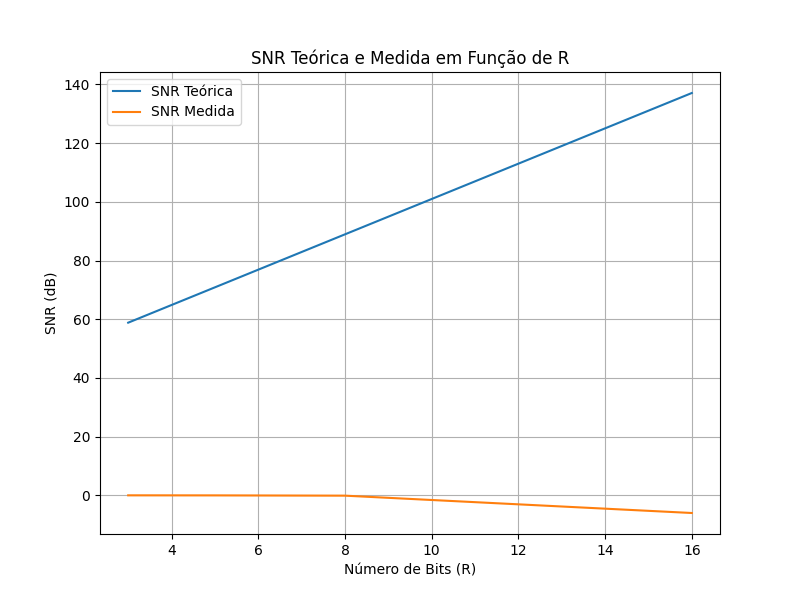

R = 3, SNR Teórica = 58.83 dB, SNR Medida = 0.00 dB
R = 5, SNR Teórica = 70.87 dB, SNR Medida = -0.02 dB
R = 8, SNR Teórica = 88.93 dB, SNR Medida = -0.11 dB
R = 16, SNR Teórica = 137.09 dB, SNR Medida = -6.02 dB


In [11]:
import scipy.io.wavfile as wav
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display

fs, data = wav.read("TesteVoz.wav")
print("Som original:")
display(Audio(data, rate=fs))
Vmax = np.max(np.abs(data))  # Valor máximo do som

# Valores de R (número de bits)
R_array = [3, 5, 8, 16]

# Inicialize listas para armazenar os valores da SNR teórica e medida
snr_teoria = []
snr_medida = []
print(data)
for R in R_array:

    # Realize a codificacao e descodificacao do sinal de rampa
    arr_binary = Codific(data, R)
    arr_signal = Descodific(arr_binary, R)
    print(arr_signal)

    print("Som depois da descodificacao com R =", R , ":")
    display(Audio(arr_signal, rate=fs))

    # Calcule a SNR prática
    Snr_Medido = Measure_SNRp(data,arr_signal)
    snr_medida.append(Snr_Medido)
    
    # Calcule a SNR teórica
    amplitude = np.max(np.abs(data))  # Obtém a amplitude do sinal
    P = 0.5 * (amplitude**2)
    Snr_Teorico = Measure_SNRt(R,Vmax,P)
    snr_teoria.append(Snr_Teorico)

# Crie um gráfico
plt.figure(figsize=(8, 6))
plt.plot(R_array, snr_teoria, label='SNR Teórica')
plt.plot(R_array, snr_medida, label='SNR Medida')
plt.xlabel('Número de Bits (R)')
plt.ylabel('SNR (dB)')
plt.title('SNR Teórica e Medida em Função de R')
plt.legend()
plt.grid(True)
plt.show()

# Comente os resultados
for i in range(len(R_array)):
    print(f'R = {R_array[i]}, SNR Teórica = {snr_teoria[i]:.2f} dB, SNR Medida = {snr_medida[i]:.2f} dB')

> Comentário:

Ouvindo os diferentes áudios podemos perceber que o o ruído é bastante presente, só sendo a palavra "Teste" perceptível no áudio com R=16, pois é esperado perder informação devido à pouca quantidade de bits, embora ainda houvesse com ruído de fundo em R=16.

Com base nos resultados apresentados no gráfico, podemos concluir que o SNR aumenta de forma significativa com o número de bits. No entanto, o aumento é mais lento do que o previsto pela teoria. 

Acreditamos que a diferença dos SNR's seja causada na codificação, pelo erro já referido acima sobre o tratamento de valores negativos.

A gravação de um som de 1 segundo no microfone permitiu verificar que o ruido diminui à medida que o número de número de Bits (R) aumenta.

NOTA: Este som foi gravado num microfone de um headset e depois foi amplificado no programa Audacity para se ouvir melhor, pois estava muito baixo.

# C.  Deteção e Correção de erros 

Construa uma função que implemente o Hamming(7,4). Utilize a seguinte matriz geradora:

In [12]:
import numpy as np
G=np.array([[1,0,0,0,1,1,0],[0,1,0,0,1,0,1],[0,0,1,0,0,1,1],[0,0,0,1,1,1,1]])
print(G)

[[1 0 0 0 1 1 0]
 [0 1 0 0 1 0 1]
 [0 0 1 0 0 1 1]
 [0 0 0 1 1 1 1]]


In [13]:
def Hamming_7_4(arr_bits):
    # Verifique se o array de entrada tem o tamanho correto
    if len(arr_bits) % 4 != 0:
        raise ValueError("O array de entrada deve conter um número de bits múltiplo de 4.")
    
    # Divida os bits de entrada em grupos de 4
    n_split_4 = int(len(arr_bits) / 4)
    arr_bits = np.array_split(arr_bits, n_split_4)

    # Lista para armazenar os bits codificados
    c = []

    for i in range(len(arr_bits)):
        # Realize a codificação multiplicando os bits de entrada pela matriz geradora G
        pc = np.dot(arr_bits[i], G) % 2
        c.extend(pc)

    return c

Construa uma função que dado um Numpy array M bits, para cada 7 bits detecte e corriga possíveis erros, sendo o resultado 4 bits de mensagem.

In [14]:
def DetetorCorretor(arr_binary):
    k = len(G)
    n = len(G[0])
    q = n - k
    Ht = np.zeros((n, q), dtype=int)
    
    Ht[0:4, 0:q] = G[0:4, 4:8]
    Ht[4:8, 0:4] = np.identity(q, dtype=int)

    n_split_7 = int(len(arr_binary) / 7)
    arr_binary = np.array_split(arr_binary, n_split_7)
    arr_mensagem = []

    for i in range(len(arr_binary)):
        # Calcular síndrome
        s = np.dot(arr_binary[i], Ht) % 2

        # Encontrar o índice de erro
        indx_erro = -1
        for j in range(len(Ht)):
            if np.array_equal(s, Ht[j]):
                indx_erro = j
                break

        if indx_erro != -1:
            # Corrigir o erro
            if arr_binary[i][indx_erro] == 0:
                arr_binary[i][indx_erro] = 1 + arr_binary[i][indx_erro]
            else:
                arr_binary[i][indx_erro] = 1 - arr_binary[i][indx_erro]
    
        # Inicializar a sublista antes de usá-la
        arr_mensagem.append([0, 0, 0, 0])

        for l in range(4):
            arr_mensagem[i][l] = arr_binary[i][l]

    # Converter arr_mensagem para um array numpy
    arr_mensagem = np.array(arr_mensagem)

    # Achatar a lista
    arr_binary = [bit for sublist in arr_binary for bit in sublist]

    return arr_mensagem.flatten()


Faça um conjunto de testes para verificar o correto funcionamento das funções.

In [15]:
# Exemplo de uso do Hamming (7,4)
input_bits = [1, 0, 1, 0, 1, 0, 1, 0]
c = Hamming_7_4(input_bits)
print("Mensagem:", input_bits)
print("Palavra de código", c)

# Exemplo de uso com duas palavras de código com erros em bits diferentes segundo e quarto
arr_binary = [1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1]
final_array = DetetorCorretor(arr_binary)

print("Array de entrada:", str(arr_binary))
print("Array corrigido: ",str(final_array))

# Exemplo de uso com uma palavra de código com dois erros no segundo e quarto bit
arr_binary = [1, 1, 1, 1, 1, 0, 1]
final_array = DetetorCorretor(arr_binary)

print("Array de entrada:", str(arr_binary))
print("Array corrigido: ",str(final_array)) 
#como este sistema só consegue corrigir um erro, nesta "c" ele nao consegue corrigi-la para a original mas sim para a "c" 1,1,1,1,1,1,1

Mensagem: [1, 0, 1, 0, 1, 0, 1, 0]
Palavra de código [1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1]
Array de entrada: [1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1]
Array corrigido:  [1 0 1 0 1 0 1 0]
Array de entrada: [1, 1, 1, 1, 1, 0, 1]
Array corrigido:  [1 1 1 1]


# D.  Modulação Digital


Construa uma função que simule a modulação digital QPSK. Esta função recebe como parâmetro de entrada um array de bits e retorna um array, simulando o sinal analógico modulado a transmitir. Dado que o sinal modulado é simulado (um sinal discreto), é necessário que a função ainda receba como parâmetros de entrada o número de pontos por cada símbolo ( 𝑃=8 ), simulando a amostragem. Esta função recebe ainda a energia média por bit ( 𝐸𝑏 ). Admita que a frequência da portadora é tal que cada simbolo contém um período da portadora.

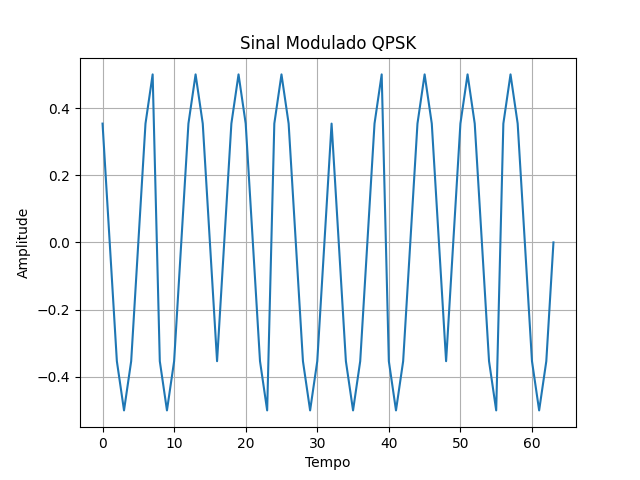

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def mod_QPSK(bits, Eb, P=8):
    # Group bits two by two
    grouped_bits = [np.array(bits[i:i+2]) for i in range(0, len(bits), 2)]
    #print("Grouped Bits:", grouped_bits)

    n = np.arange(P)
    # A**2/2 = Eb / P
    A = np.sqrt(2*Eb/P)

    s0 = A * np.cos(2*np.pi*n/P + np.pi/4)
    s1 = A * np.cos(2*np.pi*n/P + 3*np.pi/4)
    s2 = A * np.cos(2*np.pi*n/P + 5*np.pi/4)
    s3 = A * np.cos(2*np.pi*n/P + 7*np.pi/4)

    signal = np.zeros(len(grouped_bits)*P)

    for i in range(len(grouped_bits)):
        if np.array_equal(grouped_bits[i], [0, 0]):
            signal[i*P:(i+1)*P] = s0
        elif np.array_equal(grouped_bits[i], [0, 1]):
            signal[i*P:(i+1)*P] = s1
        elif np.array_equal(grouped_bits[i], [1, 0]):
            signal[i*P:(i+1)*P] = s2
        else:
            signal[i*P:(i+1)*P] = s3

    return signal

# Exemplo de uso
bits = [0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1]
Eb = 1
P=8
sinal_modulado = mod_QPSK(bits, Eb, P)

# Plotar o sinal modulado
plt.figure()
plt.plot(sinal_modulado)  # Plotar apenas os primeiros 100 pontos
plt.title('Sinal Modulado QPSK')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


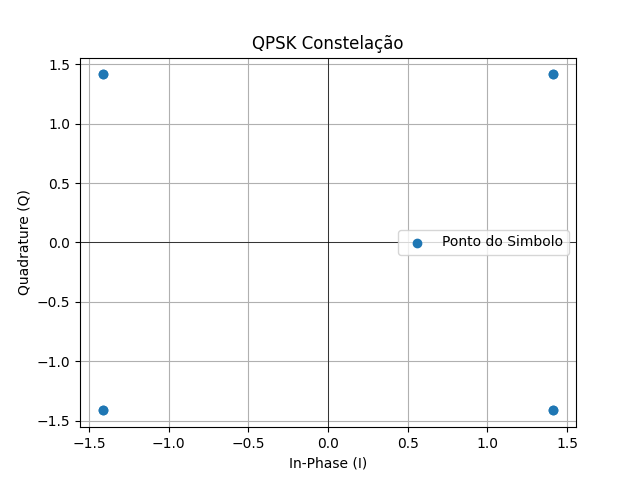

In [17]:
import matplotlib.pyplot as plt

def qpsk_comstleacao(sinal_modulado, P=8):
    # Group signal into symbols
    symbols = [sinal_modulado[i:i+P] for i in range(0, len(sinal_modulado), P)]

    # Extract in-phase and quadrature components
    I = [np.sum(symbol * np.cos(2*np.pi*np.arange(P)/P)) for symbol in symbols]
    Q = [np.sum(symbol * np.sin(2*np.pi*np.arange(P)/P)) for symbol in symbols]

    # Plot the constellation diagram
    plt.figure()
    plt.scatter(I, Q, marker='o', label='Ponto do Simbolo')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.title('QPSK Constelação')
    plt.xlabel('In-Phase (I)')
    plt.ylabel('Quadrature (Q)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Exemplo de uso
bits = [0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1]
Eb = 1
P = 8
sinal_modulado = mod_QPSK(bits, Eb, P)

# Plotar a constelação QPSK
qpsk_comstleacao(sinal_modulado, P)


Construa uma função que simule, no receptor, um filtro adaptado (desmodulação). Este deve receber um array com o sinal modulado com ruído e deve retornar um array com a sequência binária correspondente.

In [18]:
import numpy as np

def receptor(sinal_modulado, P=8):
    bits_estimados = []

    n = np.arange(P)
    Eb = 1
    A = np.sqrt(2*Eb/P)
    phi1 = A * np.cos(2*np.pi*n/P)
    phi2 = -A * np.sin(2*np.pi*n/P)

    for i in range(int(len(sinal_modulado)/P)):
        alpha = np.sum(sinal_modulado[i*P:(i+1)*P] * phi1)
        beta = np.sum(sinal_modulado[i*P:(i+1)*P] * phi2)
        
        if alpha > 0 and beta > 0:
            bits_estimados.append([0, 0])
        elif alpha < 0 and beta > 0:
            bits_estimados.append([0, 1])
        elif alpha < 0 and beta < 0:
            bits_estimados.append([1, 0])
        else:
            bits_estimados.append([1, 1])

    # Convertendo para um array numpy antes de retornar
    return np.array(bits_estimados)

# Exemplo de uso:

sinal_modulado = mod_QPSK(bits, Eb, P)

bits_estimados = receptor(sinal_modulado, P)
print(bits_estimados.flatten())



[0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1]


Considere que o canal segue o modelo de canal AWGN. 

Este pode ser implementado a partir da linha de código em baixo.  Recebe o sinal modulado (sinal_in), adiciona ruído, com uma determinada potência ${\sigma_n}^2$ (pot_noise) e devolve o sinal com ruído num array (sinal_out).

In [19]:
import numpy as np

def canal_awgn(sinal_in, pot_noise):
    # Adiciona ruído gaussiano branco ao sinal de entrada
    sinal_out = sinal_in + np.sqrt(pot_noise) * np.random.randn(len(sinal_in))
    
    return sinal_out

# Exemplo de uso
sinal_modulado = np.array([1, -1, 1, -1])  # Substitua isso pelo seu próprio sinal modulado
potencia_ruido = 0.1  # Substitua isso pela potência do ruído desejada

sinal_com_ruido = canal_awgn(sinal_modulado, potencia_ruido)
print("Sinal Modulado:", sinal_modulado)
print("Sinal com Ruído:", sinal_com_ruido)


Sinal Modulado: [ 1 -1  1 -1]
Sinal com Ruído: [ 0.80382431 -1.67941143  0.76532661 -1.41997514]


Teste

Bits entrada: [0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1]
Bits rececao: [0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1]


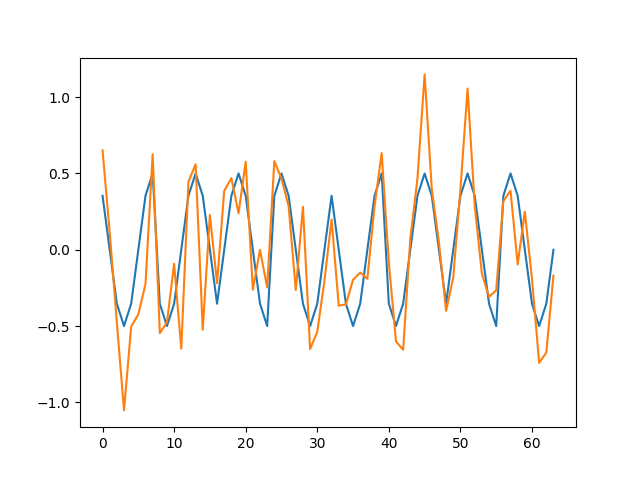

In [20]:
# Exemplo de uso:
bits = np.array([0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1])

potencia_ruido = 0.1

sinal_modulado = mod_QPSK(bits, Eb, P)

sinal_com_ruido = canal_awgn(sinal_modulado, potencia_ruido)

bits_estimados = receptor(sinal_com_ruido, P)

print("Bits entrada:", bits)
print("Bits rececao:", bits_estimados.flatten())

plt.figure()
plt.plot(sinal_modulado)
plt.plot(sinal_com_ruido)
plt.show()

Construa uma função que calcule o BER teórico para a modulação implementada.

In [21]:
import numpy as np
from scipy.special import erfc

def BER_teorico(amplitude, Tb, N0):

    P = 0.5*(amplitude**2)
    Eb = P*Tb

    # Calcula a BER teórica para QPSK
    BER_t = 0.5 * erfc(np.sqrt(Eb/N0))

    return BER_t

# Exemplo de uso
N0 = 3*10e-3
A_sinal = 3
Tb = 0.1
ber_teorico_resultado = BER_teorico(A_sinal, Tb, N0)

print(f"BER Teórico: {ber_teorico_resultado}")


BER Teórico: 2.160231528913744e-08


Avalie todo o sistema de emissão e receção. Para isso deve medir experimentalmente e comparar, sempre que possível, com os valores teóricos, os seguintes índices:

    A SNR no canal e SNR na recepção;
    
    BER antes e depois da correcção de erros;
    
    Apresente a constelação antes e depois do sinal passar pelo canal.

Para o efeito deve atribuir diferentes valores aos parâmetros do sistema e avalia-lo com e sem o modulo de correcção de erros.



Mensagem: [0 0 0 ... 0 0 0]
Palavra de código [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

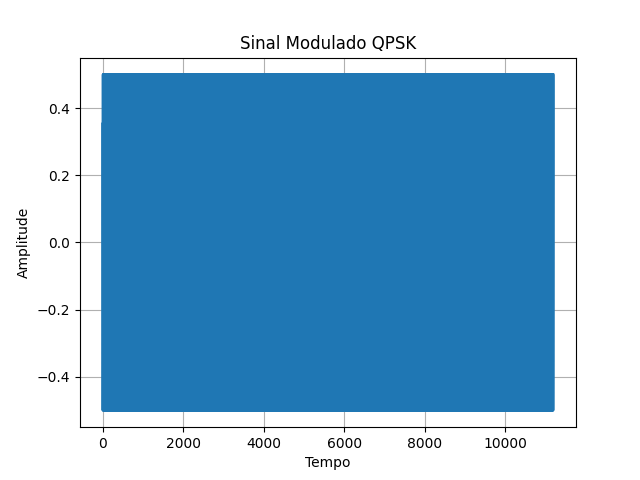


CANAL AWGN

Sinal Modulado: [ 3.53553391e-01  3.06161700e-17 -3.53553391e-01 ... -9.18485099e-17
  3.53553391e-01  5.00000000e-01]
Sinal com Ruído: [ 0.09737831  0.38644971 -0.3239515  ... -0.08243653  0.2724902
  1.0271849 ]


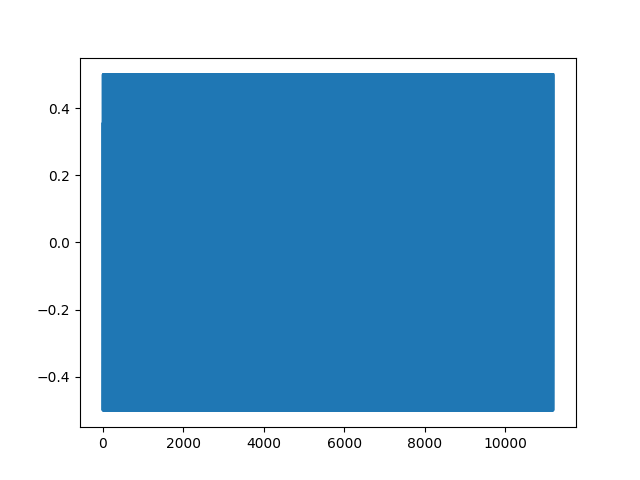

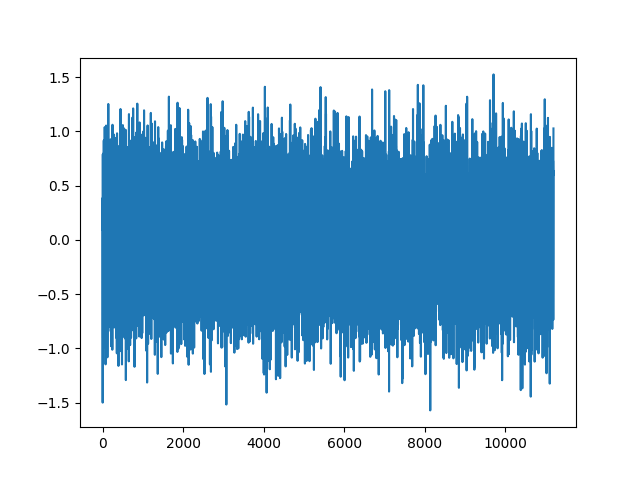


DESMODULAÇÃO

[0 0 0 ... 0 0 0]

DETECÇÃO E CORREÇÃO DE ERROS


DESCODIFICAÇÃO

[    0     0     0     0     0     0   224     0     0     0     0    14
   768    14     0     0 32768     0     0     0     0 32768     0     0
     0     0     0     0  3328     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     3
     0     0     0     0   768     0     0     0     0     0     0     0
     0     0     0 32768     0     2     0     0    48    48     0     0
     0     0   512 28672     0     0     0     0     0     0     0  3584
     0     0   224     0     0   224     0     0     0     0 32768     0
     0     0  3584     0]


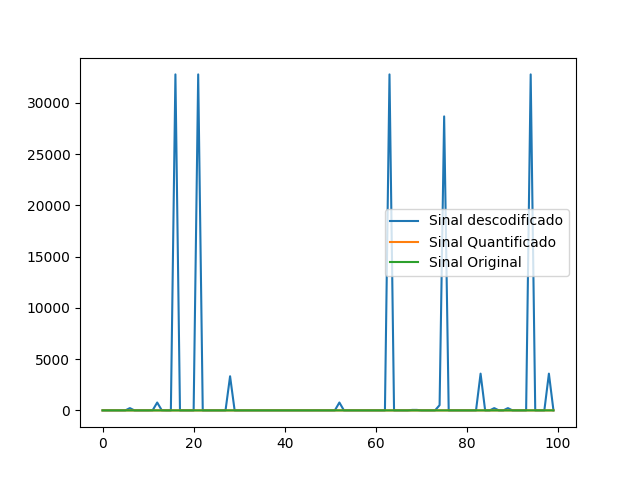

In [22]:
import matplotlib.pyplot as plt

# Função sinusoidal
n = np.arange(100)
x = 1 * np.cos(2 * np.pi * 100 / 5000 * n + np.pi / 4)

# Parâmetros do quantificador
Vmax = 4
nbits = 3
R = 16
Eb = 1
P = 8

# Função para quantificar o sinal
xq, iq = quantificadorIntegrado2(x, Vmax, nbits)

# Calculo do sinal de erro
erro = x - xq
#print("Xq:",xq)
arr_binary = Codific(xq, R)
#print("ab: ",arr_binary)

c = Hamming_7_4(arr_binary.flatten())
print("Mensagem:", arr_binary.flatten())
print("Palavra de código", c)


sinal_Modulado = mod_QPSK(c, Eb, P)


plt.figure()
plt.plot(sinal_Modulado)  # Plotar apenas os primeiros 100 pontos
plt.title('Sinal Modulado QPSK')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


potencia_ruido = 0.1  # Substitua isso pela potência do ruído desejada

sinal_com_ruido = canal_awgn(sinal_Modulado, potencia_ruido)

print("\nCANAL AWGN\n")
print("Sinal Modulado:", sinal_Modulado)
print("Sinal com Ruído:", sinal_com_ruido)
plt.figure()
plt.plot(sinal_Modulado, label="Sinal Modulado")
#plt.plot(sinal_com_ruido, label="Sinal com Ruido")
plt.show()

plt.figure()
plt.plot(sinal_com_ruido, label="Sinal com Ruido")
plt.show()

print("\nDESMODULAÇÃO\n")

bits_estimados = receptor(sinal_com_ruido, P)
print(bits_estimados.flatten())

print("\nDETECÇÃO E CORREÇÃO DE ERROS\n")

detet = DetetorCorretor(bits_estimados.flatten())
#print(arr_binary==detet)

print("\nDESCODIFICAÇÃO\n")

descodificacao = Descodific(detet.flatten(), R)
print(descodificacao)

plt.figure()
plt.plot(descodificacao, label = "Sinal descodificado")
plt.plot(xq, label = "Sinal Quantificado")
plt.plot(x, label = "Sinal Original")
plt.legend()
plt.show()

# Resultados pedidos

SNR_AntesCanal:  6.024889050218263
SNR_DepoisCanal:  -90.3135402627216
BER_AntesCorrecao: 2.160231528913744e-08
BER_DepoisCorrecao: 2.160231528913744e-08
ConstQPSK_AntesCanal: 


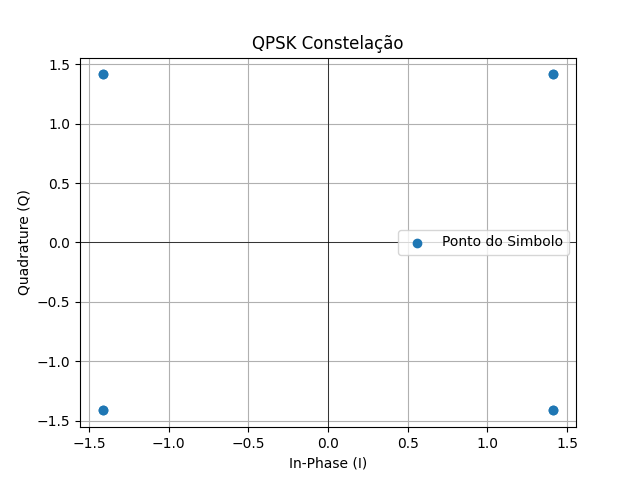

ConstQPSK_DepoisCanal: 


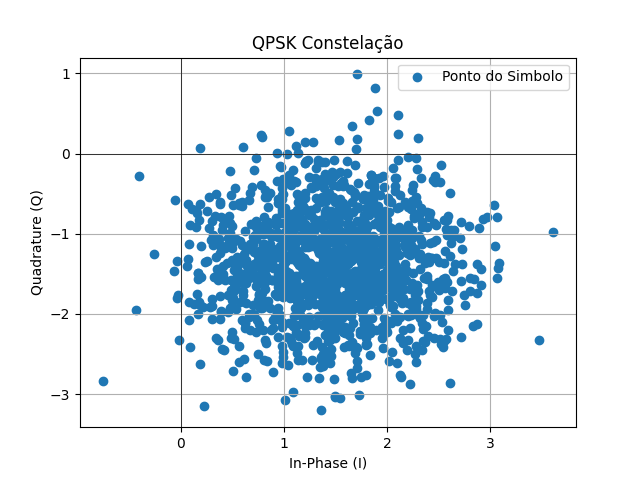

In [23]:
"""A SNR no canal e SNR na recepção;
    
    BER antes e depois da correcção de erros;
    
    Apresente a constelação antes e depois do sinal passar pelo canal."""


# SNR

SNR_AntesCanal = Measure_SNRp(x, xq)
SNR_DepoisCanal = Measure_SNRp(x, descodificacao)

print("SNR_AntesCanal: ", SNR_AntesCanal)
print("SNR_DepoisCanal: ", SNR_DepoisCanal)

# BER

N0 = 3*10e-3
A_sinal = 3 #Segundo o gráfico acima, a amplitude dos sinais é a mesma
Tb = 0.1

BER_AntesCorrecao = BER_teorico(A_sinal, Tb, N0)
BER_DepoisCorrecao = BER_teorico(A_sinal, Tb, N0)

print(f"BER_AntesCorrecao: {BER_AntesCorrecao}")
print(f"BER_DepoisCorrecao: {BER_DepoisCorrecao}")

#Constelação

print("ConstQPSK_AntesCanal: ")
ConstQPSK_AntesCanal = qpsk_comstleacao(sinal_modulado,P)

print("ConstQPSK_DepoisCanal: ")
ConstQPSK_DepoisCanal = qpsk_comstleacao(sinal_com_ruido,P)

Simule o sistema com um sinal wav e apresente tempos de processamento para cada um dos blocos.

Audio original:


Audio quantificado com R: 16
erro de quant:  [-980.875 -992.875 -993.875 ...  992.875 -993.875 -991.875]


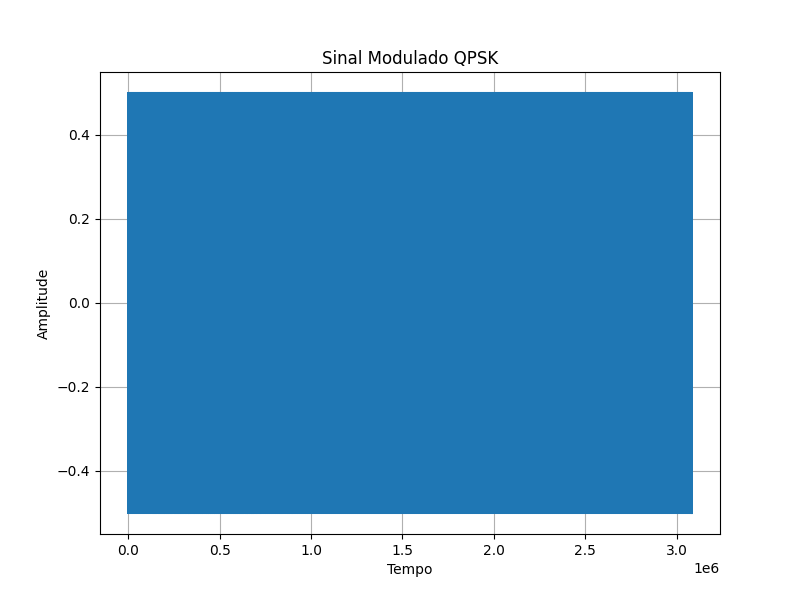


CANAL AWGN

Sinal Modulado: [ 3.53553391e-01  3.06161700e-17 -3.53553391e-01 ...  1.53080850e-16
 -3.53553391e-01 -5.00000000e-01]
Sinal com Ruído: [ 0.48647905  0.30903969  0.42664184 ... -0.04564391  0.08281784
 -0.35534673]

DESMODULAÇÃO

[0 0 0 ... 0 1 0]

DETECÇÃO E CORREÇÃO DE ERROS

Mensagem: [0 0 0 ... 0 1 0]
Palavra de código [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0

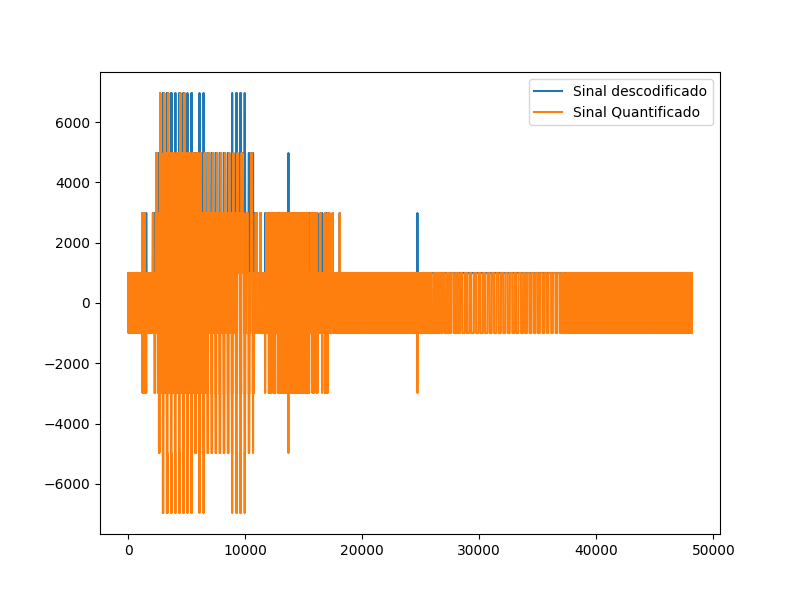

In [24]:
import scipy.io.wavfile as wav
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display


fs, data = wav.read("TesteVoz.wav")
print("Audio original:")
display(Audio(data, rate=fs))

Vmax = np.max(np.abs(data))  # Valor máximo do som

nbits = 3
R = 16
Eb = 1
P = 8

# Função para quantificar o sinal
xq, iq = quantificadorIntegrado2(data, Vmax, nbits)

print("Audio quantificado com R:" , R)

# Calculo do sinal de erro
erro = data - xq
print("erro de quant: ", erro)

arr_binary = Codific(xq, R)

sinal_Modulado = mod_QPSK(arr_binary, Eb, P)

plt.figure(figsize=(8, 6))
plt.plot(sinal_Modulado)  # Plotar apenas os primeiros 100 pontos
plt.title('Sinal Modulado QPSK')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


potencia_ruido = 0.1  # Substitua isso pela potência do ruído desejada

sinal_com_ruido = canal_awgn(sinal_Modulado, potencia_ruido)
print("\nCANAL AWGN\n")
print("Sinal Modulado:", sinal_Modulado)
print("Sinal com Ruído:", sinal_com_ruido)

print("\nDESMODULAÇÃO\n")

bits_estimados = receptor(sinal_Modulado, P)
print(bits_estimados.flatten())

print("\nDETECÇÃO E CORREÇÃO DE ERROS\n")

c = Hamming_7_4(bits_estimados.flatten())
print("Mensagem:", bits_estimados.flatten())
print("Palavra de código", c)

print("\nDESCODIFICAÇÃO\n")

descodificacao = Descodific(bits_estimados.flatten(), R)


display(Audio(descodificacao, rate=fs))

plt.figure(figsize=(8, 6))
plt.plot(descodificacao, label = "Sinal descodificado")
plt.plot(xq, label = "Sinal Quantificado")
plt.legend()
plt.show()

# Resultados Pedidos

SNR_AntesCanal:  18.06179973983887
SNR_DepoisCanal:  -5.459952685685559
BER_AntesCorrecao: 0.0
BER_DepoisCorrecao: 0.0
ConstQPSK_AntesCanal: 


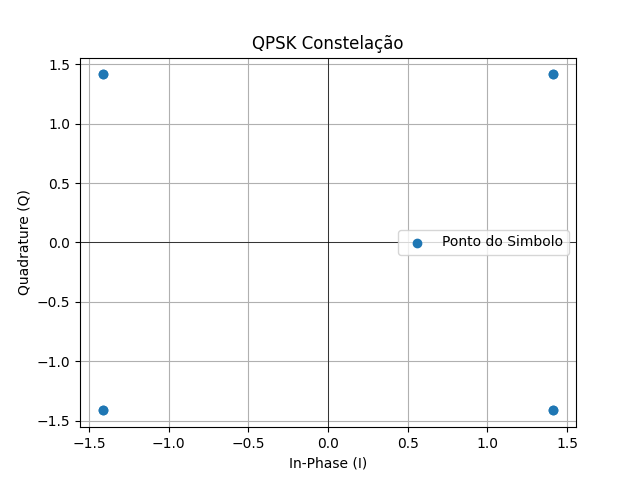

ConstQPSK_DepoisCanal: 


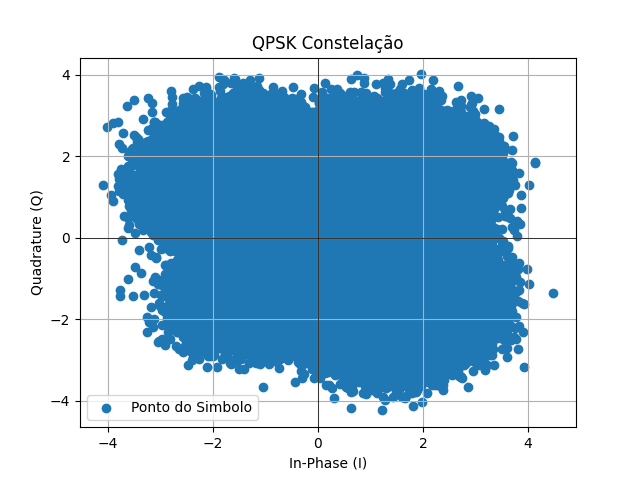

In [25]:
"""A SNR no canal e SNR na recepção;
    
    BER antes e depois da correcção de erros;
    
    Apresente a constelação antes e depois do sinal passar pelo canal."""


# SNR

SNR_AntesCanal = Measure_SNRp(data, xq)
SNR_DepoisCanal = Measure_SNRp(data, descodificacao)

print("SNR_AntesCanal: ", SNR_AntesCanal)
print("SNR_DepoisCanal: ", SNR_DepoisCanal)

# BER

N0 = 3*10e-3
A_sinal = Vmax
Tb = 0.1

BER_AntesCorrecao = BER_teorico(A_sinal, Tb, N0)
BER_DepoisCorrecao = BER_teorico(A_sinal, Tb, N0)

print(f"BER_AntesCorrecao: {BER_AntesCorrecao}")
print(f"BER_DepoisCorrecao: {BER_DepoisCorrecao}")

#Constelação

print("ConstQPSK_AntesCanal: ")
ConstQPSK_AntesCanal = qpsk_comstleacao(sinal_modulado,P)

print("ConstQPSK_DepoisCanal: ")
ConstQPSK_DepoisCanal = qpsk_comstleacao(sinal_com_ruido,P)